# Import data

Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import requests
import pickle
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

Loading the dataset from the 'Data.csv' file using the pandas read_csv function

In [2]:
data = pd.read_csv('Data.csv')

# EDA

Check head, shape and info; Checking the dimensions of the dataset (number of rows and columns) and displaying the first few rows to get an overview of the data.

In [3]:
display(data.shape)
data.head()

(39981, 14)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


# Cleaning Data

Check Nan Values

In [4]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [5]:
data[data.isnull().any(axis=1)]

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
27785,80939,460000.0,3,3,1444,3124 LOOT DR,Colorado Springs,Colorado,0,0.0,El Paso,NaN,38.87772,-104.67742
27786,80939,565000.0,6,4,3064,2418 TEMPEST DR,Colorado Springs,Colorado,0,0.0,El Paso,NaN,38.87772,-104.67742


 Removing rows containing missing values in the 'Median Household Income' column because I dont think it is necessary to fil nan.

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
data.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [10]:
data.columns

Index(['zip_code', 'price', 'beds', 'baths', 'living_space', 'address', 'city',
       'state', 'zip_code_population', 'zip_code_density', 'county',
       'median_household_income', 'latitude', 'longitude'],
      dtype='object')

Check duplicates

In [11]:
duplicates = data.duplicated()
duplicates.value_counts()

False    39017
True       962
dtype: int64

Here I elimineted the duplicates using drop and then reset the index

In [12]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39012    False
39013    False
39014    False
39015    False
39016    False
Length: 39017, dtype: bool

# Wrangling Data

Check unique values of columns

In [13]:
def value_count(df):
    for columns in df:
        print(len(df[columns].value_counts()),columns)
    return

Counting and displaying the number of unique values for each column, providing insights into the diversity of the data.

In [14]:
value_count(data)

1732 zip_code
5196 price
31 beds
28 baths
4623 living_space
38825 address
243 city
29 state
1711 zip_code_population
1705 zip_code_density
88 county
1722 median_household_income
1732 latitude
1732 longitude


Check data types

In [15]:
data.dtypes

zip_code                     int64
price                      float64
beds                         int64
baths                        int64
living_space                 int64
address                     object
city                        object
state                       object
zip_code_population          int64
zip_code_density           float64
county                      object
median_household_income    float64
latitude                   float64
longitude                  float64
dtype: object

Checking unique values

In [16]:
data['baths'].unique()  
data['baths'].value_counts()

2     16396
3     10602
1      6725
4      3485
5      1059
6       418
7       166
8        74
9        31
10       16
11        9
12        8
14        4
15        3
16        3
18        3
20        3
17        2
28        1
66        1
21        1
24        1
36        1
19        1
37        1
42        1
46        1
56        1
Name: baths, dtype: int64

Drop the values with almost none repetition, because there is a lot of difference between the unique values.

In [17]:
baths_counts = data['baths'].value_counts()
data = data[data['baths'].isin(baths_counts.index[baths_counts > 9])]


In [18]:
data['beds'].unique()  
data['beds'].value_counts()

3     16420
4      9358
2      7629
5      2638
1      2080
6       573
7       148
8        72
10       14
12       14
9        12
11        6
14        3
16        2
24        1
22        1
13        1
Name: beds, dtype: int64

In [19]:
beds_counts = data['beds'].value_counts()
data = data[data['beds'].isin(beds_counts.index[beds_counts > 9])]


Reduce Zip Code and city Variability
Due to the wide variety of Zip Codes and cities, we aim to enhance model performance by keeping the top 10 and grouping the rest into 'Other'.

In [20]:
data['zip_code'].unique()  
zip_code_counts = data['zip_code'].value_counts()
top_10_zip_codes = zip_code_counts.head(10).index
data['zip_code'] = data['zip_code'].apply(lambda x: x if x in top_10_zip_codes else 'Other')

In [21]:
data['city'].unique()  
city_counts = data['city'].value_counts()
top_10_city_codes = city_counts.head(10).index
data['city'] = data['city'].apply(lambda x: x if x in top_10_city_codes else 'Other')

In [22]:
data['zip_code'].value_counts()

Other    37405
79928      193
23456      190
93727      174
27610      156
85212      152
23451      143
76179      141
79938      141
20002      136
78253      127
Name: zip_code, dtype: int64

In [23]:
data['zip_code'] = data['zip_code'].astype('object')

In [24]:
data.dtypes

zip_code                    object
price                      float64
beds                         int64
baths                        int64
living_space                 int64
address                     object
city                        object
state                       object
zip_code_population          int64
zip_code_density           float64
county                      object
median_household_income    float64
latitude                   float64
longitude                  float64
dtype: object

In [25]:
data['city'].unique()  
city_counts = data['city'].value_counts()

Generating a list of unique cities present in the DataFrame.

In [26]:
unique_cities = city_counts.index.tolist()
print(unique_cities)

['Other', 'Mesa', 'Charlotte', 'Virginia Beach', 'Denver', 'Albuquerque', 'Louisville', 'Raleigh', 'Dallas', 'Indianapolis', 'San Antonio']


# Separate numerical and categorical data


Dividing the dataset into two subsets - one containing numerical columns and the other containing categorical columns.


In [27]:
categorical = data.select_dtypes(include=object)
numerical = data.select_dtypes(include=np.number)
print(categorical)
print(numerical)

      zip_code                 address   city       state    county
0        Other       74 GRAND ST APT 3  Other    New York  New York
1        Other   140 CHARLES ST APT 4D  Other    New York  New York
2        Other             38 JONES ST  Other    New York  New York
3        Other    81 BEDFORD ST APT 3F  Other    New York  New York
4        Other   145 E 48TH ST APT 11E  Other    New York  New York
...        ...                     ...    ...         ...       ...
39012    Other         2626 27TH AVE W  Other  Washington      King
39013    Other         3215 32ND AVE W  Other  Washington      King
39014    Other         3257 22ND AVE W  Other  Washington      King
39015    Other  3711 26TH PL W APT 102  Other  Washington      King
39016    Other         2911 25TH AVE W  Other  Washington      King

[38958 rows x 5 columns]
           price  beds  baths  living_space  zip_code_population  \
0      3999000.0     2      3          1967                29563   
1      1650000.0     1

Begin with Numerical Data

In [28]:
discrete_lst = []
continuous_lst = []
for col in numerical.columns:
    if len(data[col].unique()) < (data.shape[0] * 0.04):
        discrete_lst.append(col)
    else:
        continuous_lst.append(col)
display(discrete_lst)
display(continuous_lst)

['beds', 'baths']

['price',
 'living_space',
 'zip_code_population',
 'zip_code_density',
 'median_household_income',
 'latitude',
 'longitude']

Create a function to differentiate between discrete and continuous variables

In [29]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
    

In [30]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [31]:
print(discrete_lst)
print(continuous_lst)

['beds', 'baths']
['price', 'living_space', 'zip_code_population', 'zip_code_density', 'median_household_income', 'latitude', 'longitude']


Plot a correlation matrix

In [32]:
correlations_matrix = numerical.corr()
correlations_matrix

,price,beds,baths,living_space,zip_code_population,zip_code_density,median_household_income,latitude,longitude
price,1.000000,0.267676,0.488528,0.514454,-0.045923,0.154601,0.428918,-0.059171,-0.170911
beds,0.267676,1.000000,0.628764,0.617225,0.073508,-0.175243,0.024640,-0.053359,0.026766
baths,0.488528,0.628764,1.000000,0.744056,-0.004127,-0.094632,0.274433,-0.111520,0.015773
living_space,0.514454,0.617225,0.744056,1.000000,-0.051910,-0.122091,0.242413,-0.059931,-0.001609
zip_code_population,-0.045923,0.073508,-0.004127,-0.051910,1.000000,0.106745,-0.122743,-0.088150,-0.018763
zip_code_density,0.154601,-0.175243,-0.094632,-0.122091,0.106745,1.000000,0.179370,0.181435,0.018117
median_household_income,0.428918,0.024640,0.274433,0.242413,-0.122743,0.179370,1.000000,0.045569,-0.228002
latitude,-0.059171,-0.053359,-0.111520,-0.059931,-0.088150,0.181435,0.045569,1.000000,-0.041504
longitude,-0.170911,0.026766,0.015773,-0.001609,-0.018763,0.018117,-0.228002,-0.041504,1.000000


Creating a heatmap to visualize the correlation matrix, showing relationships between numerical variables.

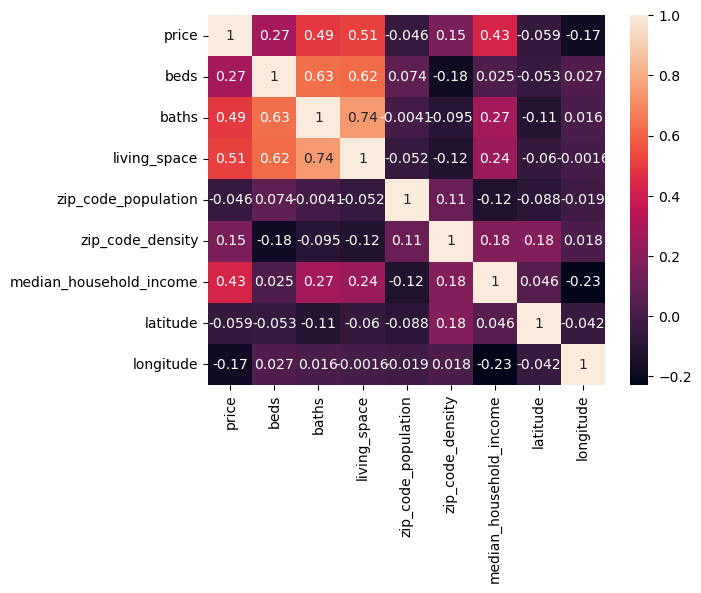

In [33]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Plot distributions for discrete variables
Generating distribution plots for discrete numerical variables to understand their data distribution.


/var/folders/d9/_ctzl6l91nb3xf6zfxnk4py80000gn/T/ipykernel_27419/113429703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


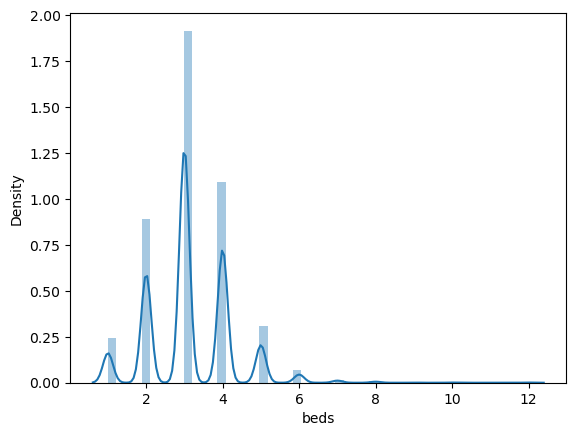

/var/folders/d9/_ctzl6l91nb3xf6zfxnk4py80000gn/T/ipykernel_27419/113429703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


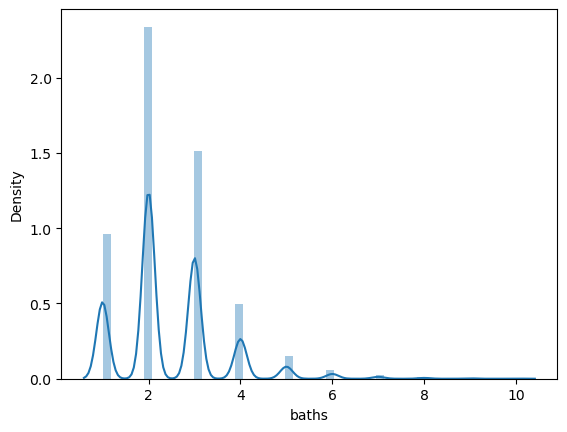

In [34]:
for column in numerical[discrete_lst]:
    sns.distplot(numerical[column])
    plt.show()

Plot distributions for continuous variables
Creating histogram plots for continuous numerical variables to visualize their data distribution.

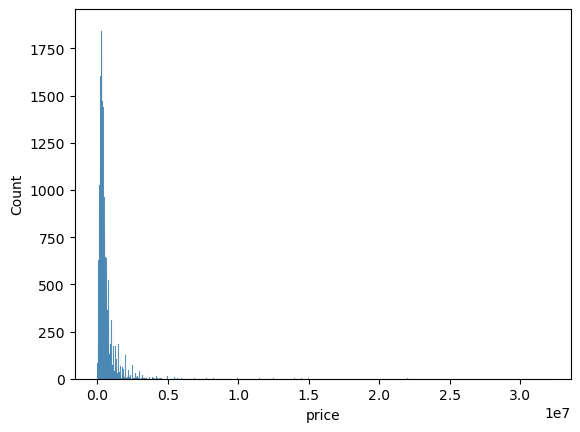

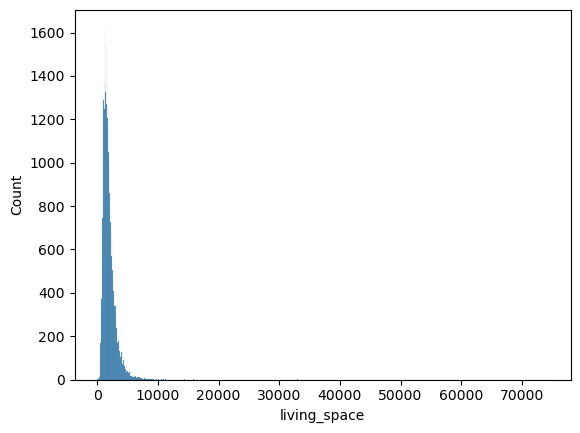

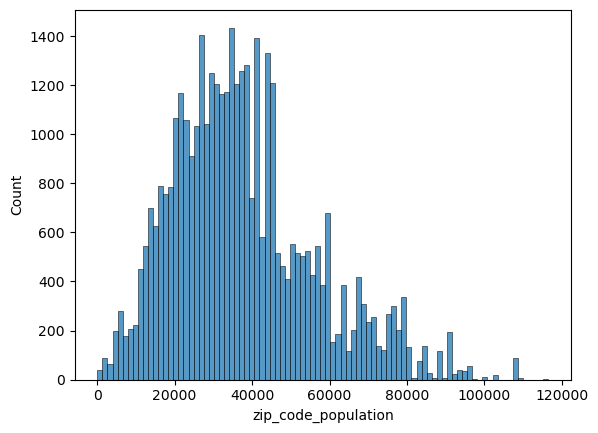

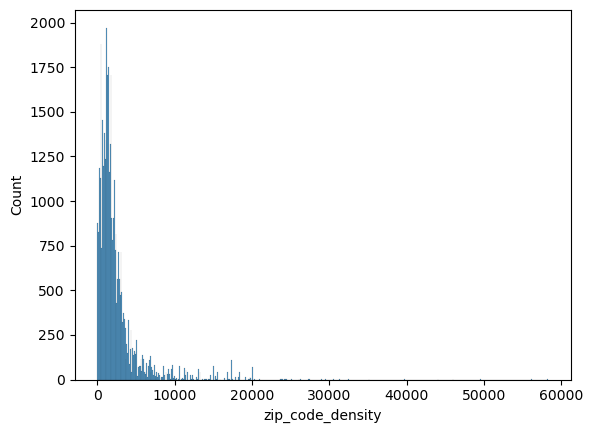

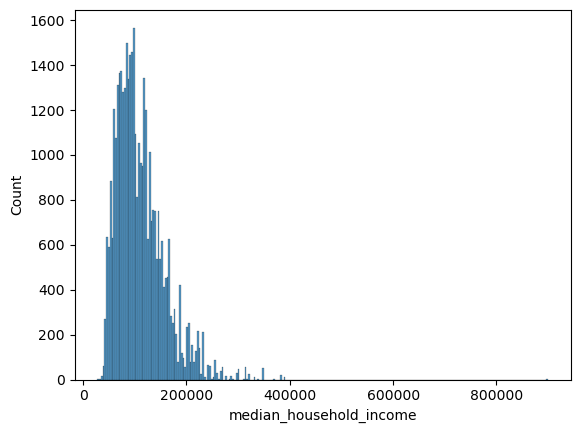

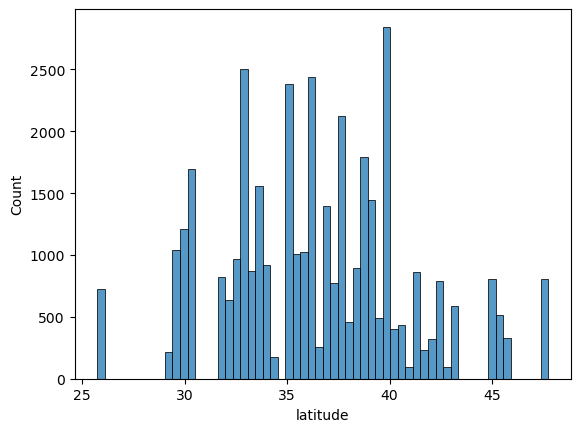

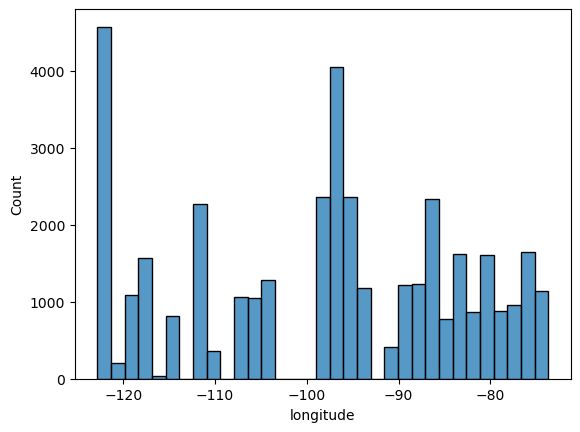

In [35]:
for column in numerical[continuous_lst]:
    sns.histplot(numerical[column])
    plt.show()

Check for outliers in continuous variables
Using boxplots to identify potential outliers in continuous numerical variables.

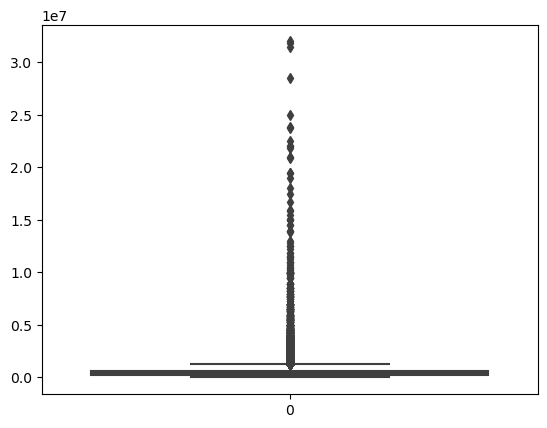

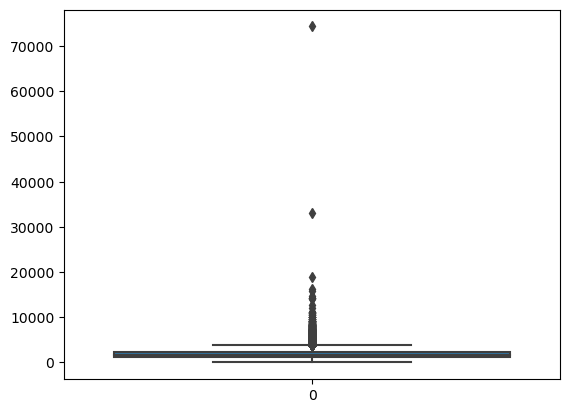

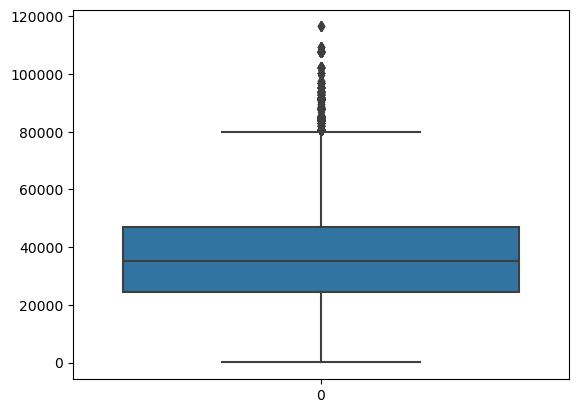

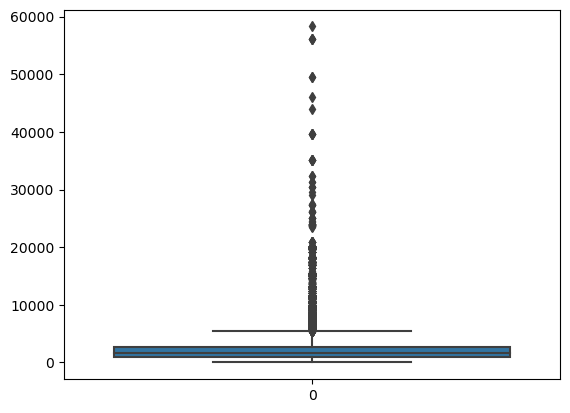

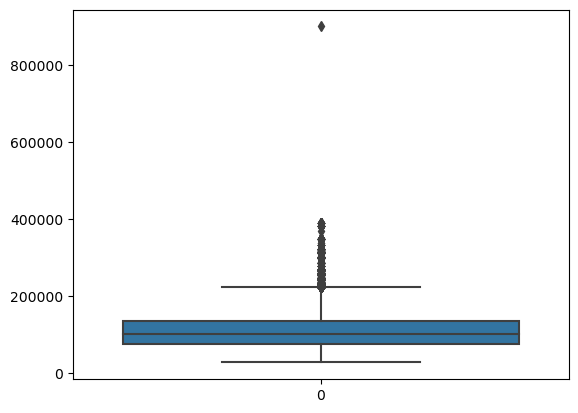

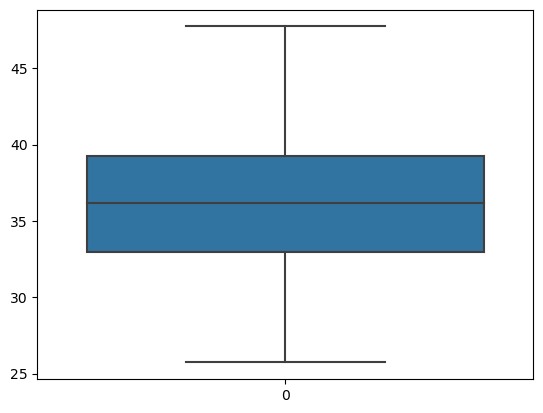

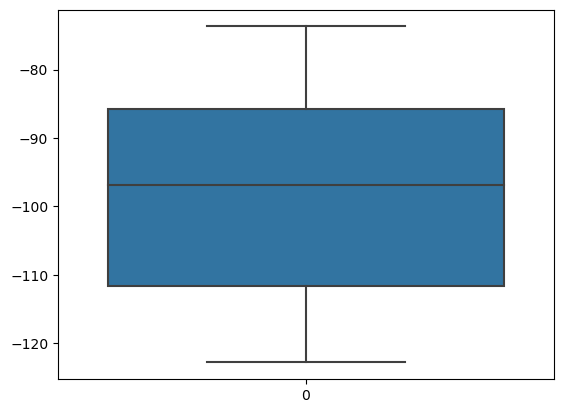

In [36]:
for column in numerical[continuous_lst]:
    sns.boxplot(numerical[column])
    plt.show()

Handle outliers in 'price' and 'living_space'
Applying outlier handling techniques specifically to the 'price' and 'living_space' columns.


In [37]:
# Calculate the IQR
iqr = np.nanpercentile(data['price'], 75) - np.nanpercentile(data['price'], 25)

# Calculate the upper limit for outliers
upper_limit = np.nanpercentile(data['price'], 75) + 1.5 * iqr

# Check for outliers
outliers = data[data['price'] > upper_limit]

# Calculate the number of outliers
count_outer_75 = len(outliers)

print("Number of possible Outliers:", count_outer_75)

Number of possible Outliers: 3488


In [38]:
iqr = np.nanpercentile(data['living_space'], 75) - np.nanpercentile(data['living_space'], 25)
upper_limit = np.nanpercentile(data['living_space'], 75) + 1.5 * iqr
outliers = data[data['living_space'] > upper_limit]
count_outer_75 = len(outliers)
print("Number of possible Outliers:", count_outer_75)

Number of possible Outliers: 1872


It's also essential to note that we cannot exclude any values from our target dataset.

In [39]:
outliers = data['living_space'].nlargest(3)
outliers

1060     74340
30023    33000
5704     18930
Name: living_space, dtype: int64

In [40]:
indices_outliers = data['living_space'].nlargest(3).index

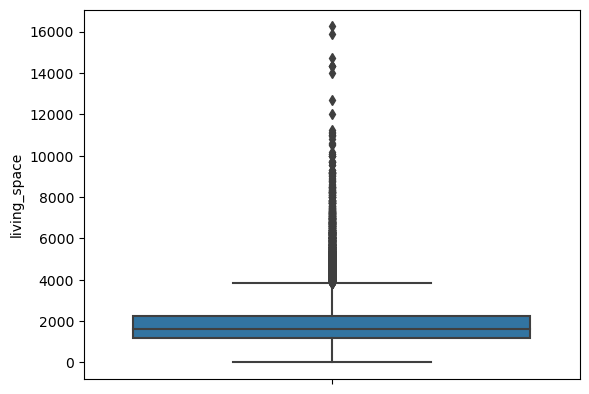

In [41]:
data = data.drop(indices_outliers)
sns.boxplot(y=data['living_space'])
plt.show()

In [42]:
data.reset_index(drop=True, inplace=True)

# Modeling

X/y split
Select the target variable 'price' and split features

In [43]:
y = data['price']
y = y.to_frame(name='price')
X = data.drop(['price','address','county','city','zip_code_population','zip_code_density'], axis=1)

Split the dataset into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (31164, 8)
y_train shape is: (31164, 1)
X_test shape is: (7791, 8)
y_test shape is: (7791, 1)


Split numerical and categorical features in training and testing sets


In [45]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)
X_train_cat = X_train_cat.astype(str)
X_test_cat = X_test_cat.astype(str)

Scaling Numerical Data./
MinMaxScaler is used to scale numerical features./
The scaler is fitted only on the training set, and the same transformation is applied to the test set.

In [46]:
transformer = MinMaxScaler().fit(X_train_num) # we just run this 'fit' for the train model, for the test model we DON´T re-fit
X_train_num_scaled = transformer.transform(X_train_num)
print(X_train_num_scaled.shape)
# transforming it back to a dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_train_num_scaled
# apply scaler to X_test_num, don't re-fit
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_num_scaled.head()

(31164, 6)


,beds,baths,living_space,median_household_income,latitude,longitude
0,0.090909,0.111111,0.056561,0.105289,0.504364,0.952872
1,0.090909,0.000000,0.074286,0.029077,0.758810,0.811264
2,0.181818,0.111111,0.110844,0.087662,0.277958,0.331752
3,0.181818,0.111111,0.171837,0.039096,0.543971,0.518410
4,0.181818,0.222222,0.125431,0.113500,0.646639,0.970799


Encoding Categorical Data./OneHotEncoder is used to encode categorical features./
The encoder is fitted only on the training set, and the encoded columns are obtained./

In [47]:
# we just run this 'fit' for the train model, for the test model we DON´T re-fit, but we still drop the first column
encoder = OneHotEncoder(drop='first').fit(X_train_cat)  # Fiting and Dropping the first varaible of each column
encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) # assigning column names
onehot_encoded_train_cat = pd.DataFrame(encoded, columns=cols)
onehot_encoded_train_cat.head(20)

,zip_code_23451,zip_code_23456,zip_code_27610,zip_code_76179,zip_code_78253,zip_code_79928,zip_code_79938,zip_code_85212,zip_code_93727,zip_code_Other,...,state_North Carolina,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Tennessee,state_Texas,state_Virginia,state_Washington,state_Wisconsin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


 Concatenation of Scaled and Encoded Features

In [48]:
# Concatenating numerical data after scaling
X_train_treated = pd.concat([X_train_num_scaled, onehot_encoded_train_cat], axis=1)
# Reset the index
X_train_treated = X_train_treated.reset_index()
#Dropping the duplicated index
X_train_treated = X_train_treated.drop('index',axis=1)
X_train_treated

,beds,baths,living_space,median_household_income,latitude,longitude,zip_code_23451,zip_code_23456,zip_code_27610,zip_code_76179,...,state_North Carolina,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Tennessee,state_Texas,state_Virginia,state_Washington,state_Wisconsin
0,0.181818,0.000000,0.062531,0.021875,0.755287,0.806447,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090909,0.111111,0.044190,0.166421,0.524342,0.019841,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.181818,0.000000,0.070039,0.047125,0.615797,0.939340,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.042344,0.144716,0.636988,0.363006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.181818,0.111111,0.078040,0.069632,0.207742,0.836892,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31159,0.363636,0.222222,0.152757,0.115707,0.675571,0.990806,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31160,0.181818,0.000000,0.071763,0.149300,0.186130,0.557893,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31161,0.181818,0.111111,0.077671,0.032354,0.501487,0.062391,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31162,0.000000,0.000000,0.019449,0.108157,0.317381,0.114852,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Similar Treatment for the Test Set./The same scaler and encoder used in the training set are applied to the test set.

In [49]:

'''For the TEST part'''
# apply scaler to X_test_num, don't re-fit
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_num_scaled.head()

# apply encoder to X_test_cat, don't re-fit
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_cat = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test_cat.head()

# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_num_scaled, onehot_encoded_test_cat], axis=1)

# Reset the index
X_test_treated = X_test_treated.reset_index()
#Dropping the duplicated index
X_test_treated = X_test_treated.drop('index',axis=1)
X_test_treated.head()

y_test = y_test.reset_index()
y_test = y_test.drop('index',axis=1)
y_test.head()

,price
0,239900.0
1,27950.0
2,265500.0
3,289900.0
4,500000.0


Regression Model Training

In [50]:
# LINEAR REGRESSION, FOR NUMERICAL APROACHES ONLY
lm = linear_model.LinearRegression()
lm.fit(X_train_treated, y_train)

LinearRegression()

Model Evaluation

In [51]:
# R2 Score_train
predictions = lm.predict(X_train_treated)
print (r2_score(y_train, predictions))

# R2 Score_test
predictions_test = lm.predict(X_test_treated)
r2_score(y_test, predictions_test)

0.477578189445538


0.5237053900511575

My model didn't do so good, so I'm trying out this function that checks a bunch of models at once. The goal is to see if any other models give me a better R-squared value, which basically means they might be better at predicting stuff. Just experimenting to find a better model for the regression task.

Even so, it's worth mentioning that the model has come a long way. I started with an R-squared of 0.2, if I recall correctly.

I use ravel for a conversion warning

In [52]:
# List of models to try
models_to_try = [
    LinearRegression(), KNeighborsRegressor(), MLPRegressor(random_state=1, max_iter=2000),
    DecisionTreeRegressor(), RandomForestRegressor()
]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train.values.ravel())  # ravel() to convert y_train to a 1D array
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_treated, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')


/Users/catimazzuferi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: LinearRegression, R^2 Score: 0.5237
Model: KNeighborsRegressor, R^2 Score: 0.6998
Model: MLPRegressor, R^2 Score: 0.4671
Model: DecisionTreeRegressor, R^2 Score: 0.3913
Model: RandomForestRegressor, R^2 Score: 0.7598


We can observe that the best R2 score is achieved when modeling with a random forest. Therefore, I decided to give it another try initially by setting the parameters manually. However, later on, I noticed that the optimal choice was to stick with the default values.

In [53]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# # Instantiate the RandomForestRegressor
# regressor = RandomForestRegressor(
#     max_depth=20,
#     min_samples_split=20,
#     min_samples_leaf=20,
#     max_samples=0.8,
#     random_state=42
# )

# # Fit the regressor to the training data
# regressor.fit(X_train_treated, y_train.values.ravel())  # ravel() to convert y_train to a 1D array

# # Evaluate the model
# train_score = regressor.score(X_train_treated, y_train)
# test_score = regressor.score(X_test_treated, y_test)

# print(f'R^2 Score on Training Data: {train_score:.4f}')
# print(f'R^2 Score on Test Data: {test_score:.4f}')

In [54]:
regressor = RandomForestRegressor()
regressor.fit(X_train_treated, y_train.values.ravel())  # ravel() to convert y_train to a 1D array

# Evaluate the model
train_score = regressor.score(X_train_treated, y_train)
test_score = regressor.score(X_test_treated, y_test)

print(f'R^2 Score on Training Data: {train_score:.4f}')
print(f'R^2 Score on Test Data: {test_score:.4f}')

R^2 Score on Training Data: 0.9657
R^2 Score on Test Data: 0.7506


# Save the Model and Transformers

In [55]:
#Save the model RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_treated, y_train.values.ravel())
with open('random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(regressor, f)

# Save the encoder OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Save the transformador MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
with open('min_max_scaler.pkl', 'wb') as f:
    pickle.dump(transformer, f)


In [56]:
data.describe()

,price,beds,baths,living_space,zip_code_population,zip_code_density,median_household_income,latitude,longitude
count,3.895500e+04,38955.000000,38955.000000,38955.000000,38955.000000,38955.000000,38955.000000,38955.000000,38955.000000
mean,6.170208e+05,3.149275,2.443127,1884.257682,37689.117212,2364.380334,110804.956719,36.446977,-98.037087
std,9.256275e+05,1.093312,1.120331,1043.650257,18629.456797,2929.435475,47288.117408,4.450687,15.018486
min,1.800000e+03,1.000000,1.000000,2.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,2.649000e+05,3.000000,2.000000,1200.000000,24440.000000,895.400000,76640.000000,32.996870,-111.634760
50%,3.999000e+05,3.000000,2.000000,1637.000000,35083.000000,1578.200000,100405.000000,36.167890,-96.839430
75%,6.650000e+05,4.000000,3.000000,2262.000000,46816.000000,2720.400000,135075.000000,39.284210,-85.715710
max,3.200000e+07,12.000000,10.000000,16250.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [57]:
# import pandas as pd

# def clean_and_save_data(input_file, output_file):
#     # Leer el archivo CSV
#     data = pd.read_csv(input_file)
    
#     # Eliminar filas con valores nulos
#     data = data.dropna()

#     # Convertir nombres de columnas a minúsculas y reemplazar espacios por guiones bajos
#     data.columns = data.columns.str.lower().str.replace(' ', '_')

#     # Eliminar duplicados
#     data = data.drop_duplicates().reset_index(drop=True)

#     # Filtrar códigos postales y ciudades
#     top_10_zip_codes = data['zip_code'].value_counts().head(10).index
#     data['zip_code'] = data['zip_code'].apply(lambda x: x if x in top_10_zip_codes else 'Other')

#     top_10_cities = data['city'].value_counts().head(10).index
#     data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')

#     # Guardar el conjunto de datos transformado
#     data.to_csv(output_file, index=False)

#     return data

# # Llamada a la función
# input_filename = 'Data.csv'
# output_filename = 'Cleaned_Data.csv'
# cleaned_data = clean_and_save_data(input_filename, output_filename)


# Web Scraping

In [58]:
data['street_view_link'] = ''

# For pass for all the rows
for index, row in data.iterrows():
# I choose to grab the lat and long because it was to slow with the address
    latitude = row['latitude']
    longitude = row['longitude']
# This is to made a link
    street_view_link = f"https://www.google.com/maps?q&layer=c&cbll={latitude},{longitude}"
# Create a new column
    data.at[index, 'street_view_link'] = street_view_link
data


,zip_code,price,beds,baths,living_space,address,city,state,zip_code_population,zip_code_density,county,median_household_income,latitude,longitude,street_view_link
0,Other,3999000.0,2,3,1967,74 GRAND ST APT 3,Other,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,https://www.google.com/maps?q&layer=c&cbll=40....
1,Other,1650000.0,1,1,718,140 CHARLES ST APT 4D,Other,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,https://www.google.com/maps?q&layer=c&cbll=40....
2,Other,760000.0,3,2,1538,38 JONES ST,Other,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,https://www.google.com/maps?q&layer=c&cbll=40....
3,Other,1100000.0,1,1,600,81 BEDFORD ST APT 3F,Other,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,https://www.google.com/maps?q&layer=c&cbll=40....
4,Other,764900.0,1,1,643,145 E 48TH ST APT 11E,Other,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260,https://www.google.com/maps?q&layer=c&cbll=40....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38950,Other,2495000.0,4,4,3380,2626 27TH AVE W,Other,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,https://www.google.com/maps?q&layer=c&cbll=47....
38951,Other,2295000.0,4,4,2878,3215 32ND AVE W,Other,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,https://www.google.com/maps?q&layer=c&cbll=47....
38952,Other,950000.0,3,2,1380,3257 22ND AVE W,Other,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,https://www.google.com/maps?q&layer=c&cbll=47....
38953,Other,425000.0,2,1,856,3711 26TH PL W APT 102,Other,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,https://www.google.com/maps?q&layer=c&cbll=47....


This web scraping its taking to much time to charge

In [59]:
# import requests
# from bs4 import BeautifulSoup

# addresses = data['address']

# def get_street_view_link(address):
#     # Construir la URL de búsqueda en Google Maps
#     search_url = f"https://www.google.com/maps/search/{address.replace(' ', '+')}"

#     # Realizar la solicitud HTTP y obtener el contenido de la página
#     response = requests.get(search_url)
#     html_content = response.text

#     # Analizar el contenido HTML con BeautifulSoup
#     soup = BeautifulSoup(html_content, 'html.parser')

#     # Buscar el enlace de Street View en la página
#     street_view_link = soup.find('a', {'href': lambda x: x and 'streetview' in x.lower()})

#     if street_view_link:
#         return street_view_link['href']
#     else:
#         return "Street View no disponible"

# # Crear una nueva columna 'Street View Link' en el DataFrame
# data['street_view_link'] = addresses.apply(get_street_view_link)

# # Mostrar el DataFrame con la nueva columna
# print(data[['address', 'street_view_link']])


# Save the data

In [60]:
data.to_csv('databasic.csv', index=False)

# Streamlit

I wanted to see if there was any possibility of predicting with only 3 inputs from my user out of 8 features. I think I was close, trying to use different types of values, but still couldn't achieve it.

In [61]:
# import os
# import streamlit as st
# import pandas as pd
# import pickle
# import requests
# from bs4 import BeautifulSoup
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# import numpy as np

# # Obtener el directorio del script
# script_directory = os.path.dirname(os.path.abspath(__file__))

# # Cargar el modelo RandomForestRegressor
# with open(os.path.join(script_directory, 'Final_Project', 'random_forest_regressor.pkl'), 'rb') as f:
#     regressor = pickle.load(f)

# # Cargar el transformador MinMaxScaler
# with open(os.path.join(script_directory, 'Final_Project', 'min_max_scaler.pkl'), 'rb') as f:
#     transformer = pickle.load(f)

# # Cargar el encoder OneHotEncoder
# with open(os.path.join(script_directory, 'Final_Project', 'one_hot_encoder.pkl'), 'rb') as f:
#     encoder = pickle.load(f)

# # Cargar el conjunto de datos (dataframe) para extraer información
# # sobre la dirección y el enlace de Street View
# data = pd.read_csv(os.path.join(script_directory, 'Final_Project', 'databasic.csv'))

# # Streamlit app
# st.title('Welcome to the Price Prediction App')

# # Sidebar menu for predictions
# st.sidebar.title('Prediction Menu')

# # User input for prediction
# baths = st.sidebar.slider('Select baths:', min_value=1, max_value=66, value=3)
# beds = st.sidebar.slider('Select beds:', min_value=1, max_value=54, value=3)
# living_space = st.sidebar.slider('Select living_space (sqft):', min_value=2, max_value=74340, value=2000)

# # Tomar todos los valores únicos de ciertas columnas, incluido zip_code
# unique_zip_codes = data['zip_code'].unique().tolist()
# unique_states = data['state'].unique().tolist()
# unique_median_household_income = data['median_household_income'].unique().tolist()
# unique_latitude = data['latitude'].unique().tolist()
# unique_longitude = data['longitude'].unique().tolist()

# # Encuentra la longitud máxima
# max_length = max(len(unique_zip_codes), len(unique_states), len(unique_median_household_income), len(unique_latitude), len(unique_longitude))

# # Asegúrate de que todas las listas tengan la misma longitud
# unique_zip_codes += [''] * (max_length - len(unique_zip_codes))
# unique_states += [''] * (max_length - len(unique_states))
# unique_median_household_income += [0] * (max_length - len(unique_median_household_income))
# unique_latitude += [0.0] * (max_length - len(unique_latitude))
# unique_longitude += [0.0] * (max_length - len(unique_longitude))

# # Use valores específicos y valores únicos para crear el DataFrame
# input_data = pd.DataFrame({
#     'zip_code': unique_zip_codes,  # Cambiado para incluir todos los valores únicos de zip_code
#     'beds': beds,
#     'baths': baths,
#     'living_space': living_space,
#     'state': unique_states,
#     'median_household_income': unique_median_household_income,
#     'latitude': unique_latitude,
#     'longitude': unique_longitude
# })

# # Limpiar categorías desconocidas ('')
# input_data['zip_code'].replace('', np.nan, inplace=True)
# input_data.dropna(subset=['zip_code'], inplace=True)

# # Ensure 'zip_code' and 'state' are strings (as they were one-hot encoded during training)
# input_data['zip_code'] = input_data['zip_code'].astype(str)
# input_data['state'] = input_data['state'].astype(str)

# # Ensure the order of columns in input_data matches the order during training
# input_data = input_data[['zip_code', 'beds', 'baths', 'living_space', 'state', 'median_household_income', 'latitude', 'longitude']]

# # Scale numerical features using the same MinMaxScaler
# scaled_numerical_features = transformer.transform(input_data[['beds', 'baths', 'living_space', 'median_household_income', 'latitude', 'longitude']])

# # One-hot encode categorical features
# try:
#     encoded_input = encoder.transform(input_data[['zip_code', 'state']]).toarray()
# except ValueError as e:
#     # Handle unknown categories by ignoring them or using a default value
#     st.warning(f"ValueError: {e}. Handling unknown categories.")
#     input_data['zip_code'] = encoder.transform(input_data['zip_code'].astype(str).values.reshape(-1, 1)).toarray()
#     encoded_input = encoder.transform(input_data[['zip_code', 'state']]).toarray()

# # Combine numerical and encoded features
# final_input = np.concatenate([scaled_numerical_features, encoded_input], axis=1)

# # Make predictions
# predicted_price = regressor.predict(final_input)[0]

# # Display predicted price
# st.sidebar.subheader(f'Estimated price for {input_data["state"].iloc[0]}:')
# st.sidebar.write(f'${predicted_price:,.2f}')

# # Find similar listings in the dataset
# similar_listings = data[
#     (data['state'] == input_data['state'].iloc[0]) &
#     (data['beds'] == beds) &
#     (data['baths'] == baths) &
#     (data['living_space'] == living_space) &
#     (data['price'].between(predicted_price - 100000, predicted_price + 100000))
# ].head(5)

# # Web scraping to get address and Street View link for each similar listing
# for _, similar_listing in similar_listings.iterrows():
#     address = similar_listing['address']
#     latitude = similar_listing['latitude']
#     longitude = similar_listing['longitude']

#     # Web scraping to get Street View link
#     search_url = f'https://www.google.com/maps?q={latitude},{longitude}'
#     response = requests.get(search_url)

#     if response.status_code == 200:
#         soup = BeautifulSoup(response.text, 'html.parser')
#         street_view_container = soup.find('a', class_='widget-reveal-card')
#         street_view_link = street_view_container['href'] if street_view_container else 'No Street View link found'
#     else:
#         street_view_link = 'Error retrieving Street View link'

#     # Display information for each similar listing
#     st.sidebar.subheader(f'Similar Listing Information:')
#     st.sidebar.write(f'Address: {address}')
#     st.sidebar.write(f'Latitude: {latitude}')
#     st.sidebar.write(f'Longitude: {longitude}')
#     st.sidebar.write(f'Street View Link: {street_view_link}')
#     st.sidebar.write('---')

